In [1]:
import pandas 
from sklearn import svm, preprocessing

In [2]:
feature_set = pandas.read_csv( 'data_sets/ddg_monomer.csv', index_col=0 ) 

data_set = pandas.read_csv( 'data_sets/thermo_paper_data_set.csv', index_col=0 )

my_data = data_set[ [ 'expression' ] ]
my_features = feature_set
my_joined_data = my_data.join( my_features ).dropna()

X = my_joined_data.drop( 'expression', axis=1 ).copy()
y = my_joined_data.expression.copy()

print X.shape
print y.shape

(112, 18)
(112,)


We are tasked with predicting 112 binary class labels ( 0=negative, 1=positive ) given a set of 18 features (about 10 labels per feature). 

First, let's see how each of the features correlates on its own. 

In [3]:
from sklearn import feature_selection

ANOVA = feature_selection.SelectKBest( feature_selection.f_classif )

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV

# from sklearn.datasets import make_classification

# # Build a classification task using 3 informative features
# X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
#                            n_redundant=2, n_repeated=0, n_classes=8,
#                            n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear", class_weight='balanced')
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

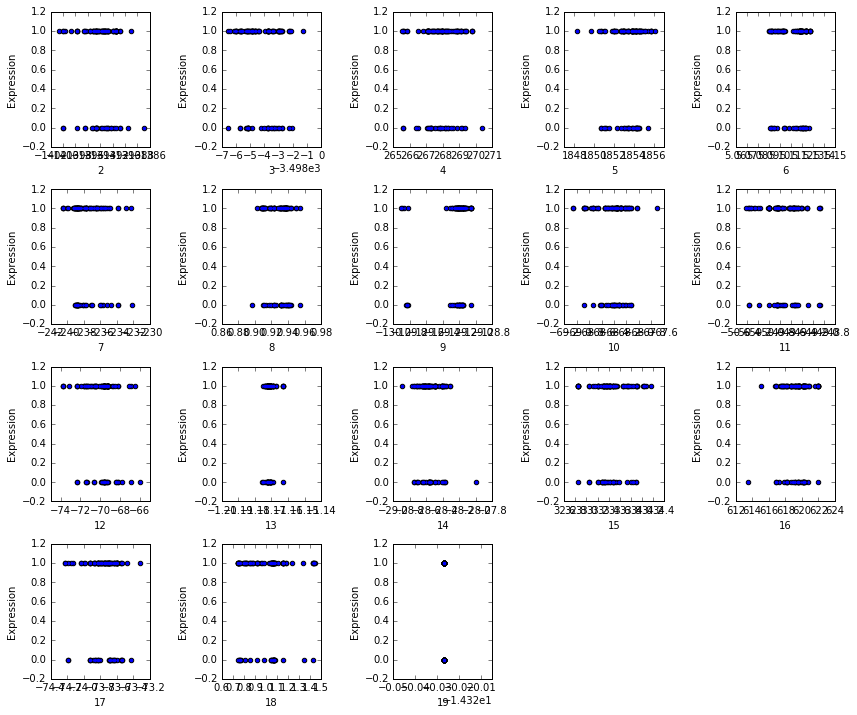

In [51]:
plt.figure( figsize=( 12,10 ) ) 
plt.subplot2grid?

for i, feature in enumerate( X.columns ):
    plt.subplot( 4, 5, i+1 ) 
    feature_vals = X[ feature ]
    plt.scatter( feature_vals, y ) 
    plt.scatter( feature_vals, y, marker='.', lw=0 ) 
    plt.xlabel( feature )
    plt.ylabel( 'Expression' ) 
    
plt.tight_layout()

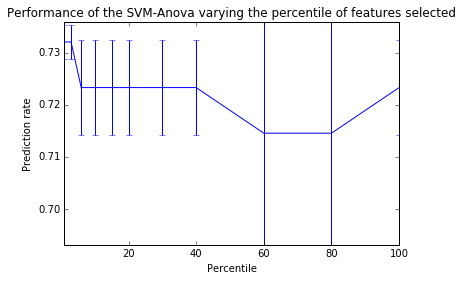

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, feature_selection, cross_validation
from sklearn.pipeline import Pipeline


transform = feature_selection.SelectPercentile(feature_selection.f_classif)
clf = Pipeline([('anova', transform), ('svc', svm.SVC(C=1.0))])

# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    # Compute cross-validation score using all CPUs
    this_scores = cross_validation.cross_val_score(clf, X, y, n_jobs=1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))

plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xlabel('Percentile')
plt.ylabel('Prediction rate')

plt.axis('tight')
plt.show()

In [ ]:
from sklearn import pipeline, decomposition, grid_search

pln = pipeline.Pipeline([
    ( 'scaler', preprocessing.StandardScaler() ), 
    ( 'PCA', decomposition.PCA() ), 
    ( 'SVM', svm.SVC() ), 
])

param_grid = {
    'SVM__C': [ 0.3, 3, ], 
    'SVM__gamma': [ 0.03, 0.3, 3 ], 
    'SVM__kernel': [ 'linear', 'rbf' ], 
    'SVM__class_weight': [ 'balanced' ], 
}

gs = grid_search.GridSearchCV( pln, param_grid, n_jobs=-1, cv=2 ) 

# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
n_components = range( 2, 17 ) 

for n in n_components:
    pln.set_params(PCA__n_components=n)
    # Compute cross-validation score using all CPUs
    this_scores = cross_validation.cross_val_score(gs, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(n_components, score_means, np.array(score_stds))

plt.title(
    'Performance of the SVM varying the number of features selected')
plt.xlabel('n_components')
plt.ylabel('model accuracy')

plt.axis('tight')
plt.show()

In [64]:
y.mean()

0.7321428571428571

In [ ]:
gs = grid_search.GridSearch

In [ ]:
gs = grid_search.GridSearchCV

In [ ]:
gs = GridSearchCV